# Single Cell RNA-seq analysis: Downsizing of Gene by Cell Matrix (For Drop-seq/InDrop/10xGenomics/Seq-well)

## I. Read in data file and see general expression level distribution

In [1]:
# Import required modules
# Python plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Numerical python library (pronounced "num-pie")
import numpy as np
# Dataframes in Python
import pandas as pd
# Statistical plotting library we'll use
import seaborn as sns
# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline
## Add more when seeing new modules in other notebooks!


In [41]:
# Read in the DGE data sheet
inFile = 'Test.dge.txt.gz'
expression = pd.read_table(inFile, 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                     index_col=0, 

                                     # Tells pandas to decompress the gzipped file if required
                                     compression='gzip')
# Print out the shape and the top 5 rows of the newly assigned dataframe
print(expression.shape)
expression.head()

(13785, 500)


,GCCAAATGCACG,AGCGGTGGCAGC,TGAACCCCAGCT,ATCTTGGCGGCG,GTTCCTACAACA,ATAGAGTCGCAT,GCGCACGTTGAG,TTCACGGCTGAG,GCGAGACACAGC,CGAGTCGGTAGC,...,GAGATCTTTTAC,CCATGCCCATAC,GTAAGCAATTTG,AGAATCGAGCCT,GTAGATCATCTC,TAATGAAGTGGA,CTCGGGATATGT,GCTAAGGTTGTT,AAGTTCAAGGGG,GGTCATGGTTCG
GENE,,,,,,,,,,,,,,,,,,,,,
ACBD3,0,0,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ACSF3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACTR2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAMTS14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADAMTS7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Convert input file name into output file names
base = inFile.strip(".dge.txt.gz")
out_filtered = base + "_filtered.mtx"
out_filtered_lr = base + "_filtered_lr.mtx"

/anaconda/envs/sca/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


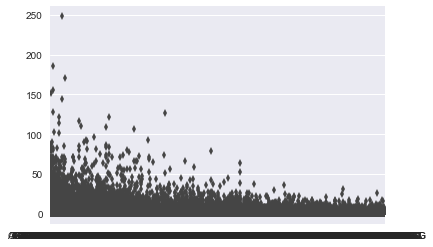

In [3]:
# See the raw distributions of data
## e.g. for gene as row name and cell as column name:
## See the distribution of gene expression level within one cell for each of the cells listed?
sns.boxplot(expression)
## Get current figure, then save to file
#fig = plt.gcf()
#fig.savefig(NameOfFigure)


In [4]:
# Log transform the data if needed
expression_logged = np.log2(expression+1)
expression_logged.head()

,GCCAAATGCACG,AGCGGTGGCAGC,TGAACCCCAGCT,ATCTTGGCGGCG,GTTCCTACAACA,ATAGAGTCGCAT,GCGCACGTTGAG,TTCACGGCTGAG,GCGAGACACAGC,CGAGTCGGTAGC,...,GAGATCTTTTAC,CCATGCCCATAC,GTAAGCAATTTG,AGAATCGAGCCT,GTAGATCATCTC,TAATGAAGTGGA,CTCGGGATATGT,GCTAAGGTTGTT,AAGTTCAAGGGG,GGTCATGGTTCG
GENE,,,,,,,,,,,,,,,,,,,,,
ACBD3,0.0,0.0,1.584963,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ACSF3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTR2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAMTS14,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAMTS7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/anaconda/envs/sca/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


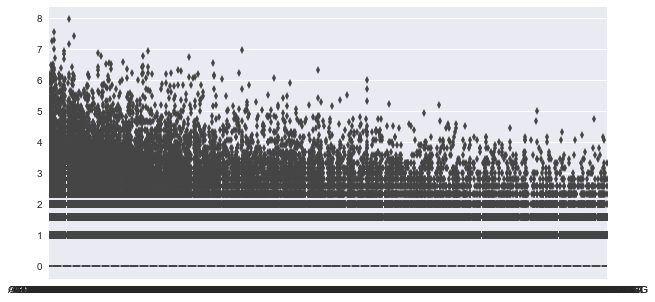

In [5]:
# Plot log transformed data with a designated size
fig, ax=plt.subplots(figsize = (10,5))
sns.boxplot(expression_logged)

# gcf = Get current figure
#fig = plt.gcf()
#fig.savefig(NameOfFigure)

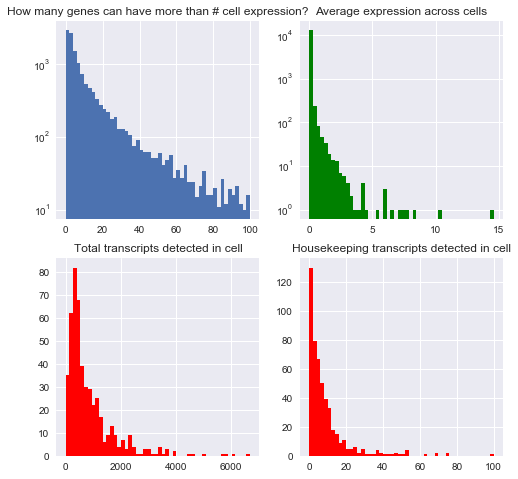

In [6]:
# More plots! 
## 1) Hist of genes falling in bins of number of cells expressing one particular gene;
bool_exp = expression > 0
num_cells_per_gene = bool_exp.sum(axis=1)
## 2) Hist of genes falling in bins of average expression across cells;
#gene_rank_by_ave = expression.rank(axis=1,method='average').index
exp_mean = expression.mean(axis=1)
## 3) Hist of cells falling in bins of aggregate expression of all genes;
exp_all_per_cell = expression.sum()
## 4) Hist of cells falling in bins of aggregate expression of housekeeping genes.
# Assign gene list to housekeeping gene list
hglist = ["ACTB","B2M","HNRPLL","HPRT","PSMB2","PSMB4","PPIA","PRPS1","PRPS1L1","PRPS1L3","PRPS2","PRPSAP1","PRPSAP2","RPL10","RPL10A","RPL10L","RPL11","RPL12","RPL13","RPL14","RPL15","RPL17","RPL18","RPL19","RPL21","RPL22","RPL22L1","RPL23","RPL24","RPL26","RPL27","RPL28","RPL29","RPL3","RPL30","RPL32","RPL34","RPL35","RPL36","RPL37","RPL38","RPL39","RPL39L","RPL3L","RPL4","RPL41","RPL5","RPL6","RPL7","RPL7A","RPL7L1","RPL8","RPL9","RPLP0","RPLP1","RPLP2","RPS10","RPS11","RPS12","RPS13","RPS14","RPS15","RPS15A","RPS16","RPS17","RPS18","RPS19","RPS20","RPS21","RPS24","RPS25","RPS26","RPS27","RPS27A","RPS27L","RPS28","RPS29","RPS3","RPS3A","RPS4X","RPS5","RPS6","RPS6KA1","RPS6KA2","RPS6KA3","RPS6KA4","RPS6KA5","RPS6KA6","RPS6KB1","RPS6KB2","RPS6KC1","RPS6KL1","RPS7","RPS8","RPS9","RPSA","TRPS1","UB"]
exp_hkg_agg = expression.loc[hglist].sum()

# Four axes, returned as a 2-d array. e.g. for showing plots in 4 
f, axarr = plt.subplots(2, 2,figsize = (8,8))
axarr[0, 0].hist(num_cells_per_gene,range=(0,100),bins=50,log=True)
axarr[0, 0].set_title('How many genes can have more than # cell expression?')
axarr[0, 1].hist(exp_mean, bins=50, log=True,color='green')
axarr[0, 1].set_title('Average expression across cells')
axarr[1, 0].hist(exp_all_per_cell, bins=50, log=False,color='red')
axarr[1, 0].set_title('Total transcripts detected in cell')
axarr[1, 1].hist(exp_hkg_agg, bins=50, log=False,color='red')
axarr[1, 1].set_title('Housekeeping transcripts detected in cell')

## Determine the cut-off lines for genes and cells
* Genes:
    * Remove genes with no expression in any cells
    * Calculate the number of genes left for each number of transcript need to be detected in at least what number of cells
    _When the computation power is high enough, don't worry about the dimensions (number of genes). Otherwise, may need to cut the number down to 3000_
* Cells:
    * Both low and high expression should be removed
    * Low: smaller than certain number of genes detected (e.g. 1000)
    * High: Look at the distribution of aggregate expression level across all cells. If it shows as bimodal, it is likely that the right hand side peak represents doublets.
    

In [26]:
## Remove low expression and high expression cells
### Remove cells that does not have certain number of transcripts detected. matrix is transposed.
mask0expcell = expression.T.sum(axis=1) > 1000
exp0cellrmd = expression.T[mask0expcell]
print(exp0cellrmd.shape)
exp0cellrmd.head()


(140, 13785)


GENE,ACBD3,ACSF3,ACTR2,ADAMTS14,ADAMTS7,AIFM2,AK6,AL627305.2,AL627305.3,AL732488.1,...,zrsr2,zswim5,zswim7,zswim8,zw10,zwilch,zyg11,zyx,zzef1,zzz3
GCCAAATGCACG,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
AGCGGTGGCAGC,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,0,0,1,1,0,0
TGAACCCCAGCT,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
ATCTTGGCGGCG,1,0,0,0,0,0,2,0,0,0,...,0,1,0,0,4,0,0,0,0,1
GTTCCTACAACA,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
### Remove cells that have more than certain number of transcripts detected.
maskdoublet = exp0cellrmd.sum(axis=1) < 5000
exp_filtered = exp0cellrmd[maskdoublet]
print(exp_filtered.shape)
exp_filtered.head()

(135, 13785)


GENE,ACBD3,ACSF3,ACTR2,ADAMTS14,ADAMTS7,AIFM2,AK6,AL627305.2,AL627305.3,AL732488.1,...,zrsr2,zswim5,zswim7,zswim8,zw10,zwilch,zyg11,zyx,zzef1,zzz3
ATCTTGGCGGCG,1,0,0,0,0,0,2,0,0,0,...,0,1,0,0,4,0,0,0,0,1
ATAGAGTCGCAT,1,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
GCGCACGTTGAG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
TTCACGGCTGAG,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
GCGAGACACAGC,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [33]:
# Apply filtering for genes and cells
## Remove low-expression genes. See below for the post-filtering gene number estimation. Here using "as least one count in more than 10 cells"
mask0exp = (exp_filtered.T > 0).sum(axis=1) >= 10
mask0exp
exp = exp_filtered.T[mask0exp]
print(exp.shape)
exp.head()

(3185, 135)


,ATCTTGGCGGCG,ATAGAGTCGCAT,GCGCACGTTGAG,TTCACGGCTGAG,GCGAGACACAGC,GTTGGACGAGCG,TGACTTCGCGAA,CGTTCCGCATAG,GGTCTGGACACC,GCAGAGTGTCCG,...,CCGGTCAATAGC,CAGAAGCTGGTC,CTCTTTGTTATC,AATAGGCGTAGA,CCCTTCGGCTGG,CGAGTTAAGTGG,CTACATATTGCC,TGTTCTTGTTAT,TCCAACAGTTAC,GCAGTCCAGGGA
GENE,,,,,,,,,,,,,,,,,,,,,
ACBD3,1,1,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
AL928854.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL954715.2,0,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
ARHGEF12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BICD2,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0


* Checkpoint: What's done at this stage?
    1. Cells with few gene detected and potential doublets removed
    2. Genes lowly expressed removed

In [12]:
# Estimate number of gene left for different filtering criteria
# Define a function for calculation
def numGene(mtx,reads_num=5, cell_num=50):
    """
    Estimate number of gene left by applying different filtering criteria. 
    For each pair of expression reads and cell number, calculate the genes that can 
    pass the criteria of have A number of reads detected in at least more than 
    B number of cells.
    Usage: numGene(reads_num, cell_num,mtx)
    Args: 
        reads_num is the upper number of expression level will be tested (count by 1).
        cell_num is the upper number of cell number will be set as threshold (count by 10).
        mtx is the data matrix input gene X cell
    """
    expreads = list(range(0,reads_num))
    cellnum = list(range(10,cell_num + 1,10))
    genenumdict = {}
    for i in expreads:
        z = []
        for j in cellnum:
            gmask = (mtx > i).sum(axis=1) >= j
            genenum = gmask.sum()
            z.append(genenum)
        genenumdict[i] = z
    return genenumdict

In [13]:
# Run numGene() on the matrix
genenumdict = numGene(expression)

In [14]:
# See how the output gene number estimation looks
genenumdict

{0: [4849, 2830, 1881, 1364, 1074],
 1: [1284, 720, 501, 377, 311],
 2: [585, 357, 258, 202, 165],
 3: [368, 232, 172, 128, 109],
 4: [255, 170, 119, 92, 73]}

In [15]:
# Define a function to plot 3D distribution of the gene number
def plotnumGene(genenumdict, reads_num=5, cell_num=50):
    cellnum = list(range(10,cell_num + 1,10))
    x = np.asarray(cellnum)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in sorted(genenumdict):
        y = np.ones(x.size)*i
        z = genenumdict[i]
        color_code = (i+0.1)/reads_num
        ax.plot(y,x,z)
    plt.show()
    return

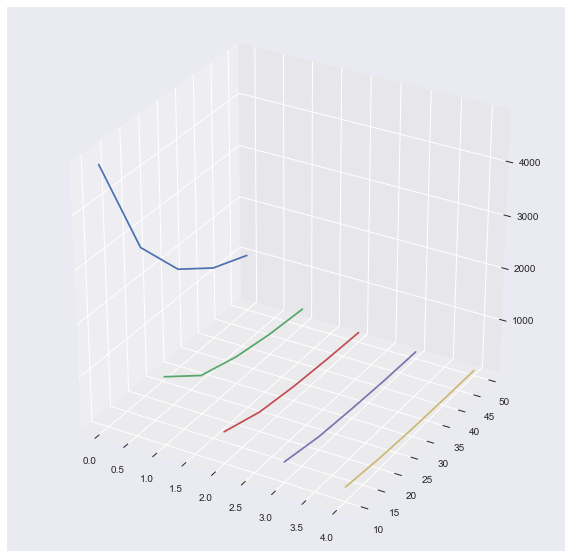

In [16]:
# Run plotnumGene() to plot
plotnumGene(numGene(expression))

In [ ]:
# Choose the criteria for gene filtering and apply that to the data matrix

* The filtered matrax is stored in variable exp. Do robust PCA to recover a low rank matrix 

In [36]:
load r_pca.py

iteration: 1, error: 12497.328462260348
iteration: 93, error: 0.20514492165314352
ymin: 0, ymax: 248


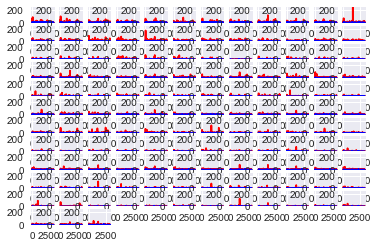

(135, 3185)


GENE,ACBD3,AL928854.1,AL954715.2,ARHGEF12,BICD2,BX004816.3,BX284638.1,BX321875.1,BX649250.1,BX664625.3,...,znf654,znf706,znf750,znf865,znfx1,zranb2,zswim5,zswim8,zw10,zyg11
ATCTTGGCGGCG,-0.000049,-0.000038,0.000024,-4.958412e-08,-0.000010,-0.000026,-4.037185e-06,-0.000012,-0.000060,-0.000018,...,0.000026,-0.000024,-0.000002,-0.000018,-0.000080,-0.000091,-0.000106,-0.000067,0.000009,0.000089
ATAGAGTCGCAT,0.000001,0.000054,-0.000028,4.785834e-05,-0.000014,-0.000008,-4.274635e-05,-0.000011,0.000024,-0.000061,...,-0.000016,-0.000007,-0.000003,0.000006,0.000026,0.000081,-0.000013,0.000065,0.000044,0.000002
GCGCACGTTGAG,-0.000002,0.000058,-0.000031,5.329153e-05,-0.000011,-0.000007,-4.279894e-05,-0.000012,0.000024,-0.000061,...,-0.000013,-0.000005,-0.000006,0.000005,0.000028,0.000075,-0.000009,0.000072,0.000043,0.000002
TTCACGGCTGAG,-0.000038,-0.000044,0.000028,-1.245889e-05,-0.000011,-0.000024,4.447659e-07,-0.000008,-0.000054,-0.000010,...,0.000020,-0.000023,0.000003,-0.000015,-0.000076,-0.000079,-0.000098,-0.000075,0.000006,0.000078
GCGAGACACAGC,-0.000033,-0.000037,0.000024,-8.677447e-06,-0.000013,-0.000023,-4.245376e-06,-0.000008,-0.000047,-0.000015,...,0.000015,-0.000022,0.000004,-0.000013,-0.000068,-0.000061,-0.000094,-0.000065,0.000011,0.000072


In [39]:
# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
rpca = R_pca(np.array(exp.T))
L, S = rpca.fit(max_iter=10000, iter_print=100)

# visually inspect results (requires matplotlib)
rpca.plot_fit()
plt.show()

# Save to dataframe
exp_lr = pd.DataFrame(L, index=exp.T.index, columns=exp.T.columns)
print(exp_lr.shape)
exp_lr.head()

In [44]:
# Save filtered matrix and the low rank matrix to file
exp.T.to_csv(out_filtered)
exp_lr.to_csv(out_filtered_lr)

* Checkpoint2
    * Robust PCR done. Both with and without smoothing matrix saved to csv (Keep the two in parallel for down stream analysis)